# Employee Attrition Experiment: Request for Comment

This synthetic dataset from Kaggle ([IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)) simulates attrition and related factors leading to employee attrition. The main objective of this dataset is to predict employee attrition. However, I explore the variables to find out if there is any potential factor(s) that leads to attrition, and propose an experiment aiming at measuring the impact of such factors towards employee attrition.  

> Spending time away from family seems to be a contributing factor in attrition. I hypothesize that allowing more time at home will decrease employee attrition. To test this hypothesis, I propose two experiments testing the effect of work-from-home and attrition. 


In [99]:
#Loading packages
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [100]:
#Loading data
data = pd.read_csv('Attrition.csv')  
data.head(5)
print("This dataset has {} total entries distributed over 35 variables with no null values. The variables are: \n{}".format(len(data), data.columns))


This dataset has 1470 total entries distributed over 35 variables with no null values. The variables are: 
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


## 1. Data exploration 

Let us first take a look at how these variables are correlated. I calculated Pearson's Correlation Coefficient (*r*) for all variables in the dataset. From the following correlation values and the correlation matrix, I find the following: 

- Except for a few, the variables in this dataset are not highly correlated. 
- **Attrition** is positively correlated with **over time** (*r* = 0.246), and this is the highest correlation among other variables. The attrition rate increases with more overtime.  
- Attrition is also weakly and positively correlated with **marital status** (*r* = 0.162) and **distance from home** (*r* = 0.07).  
- On the other hand, attrition is weakly negatively correlated with **total working years** (*r* = -0.171) and **job level** (*r* = -0.169). 

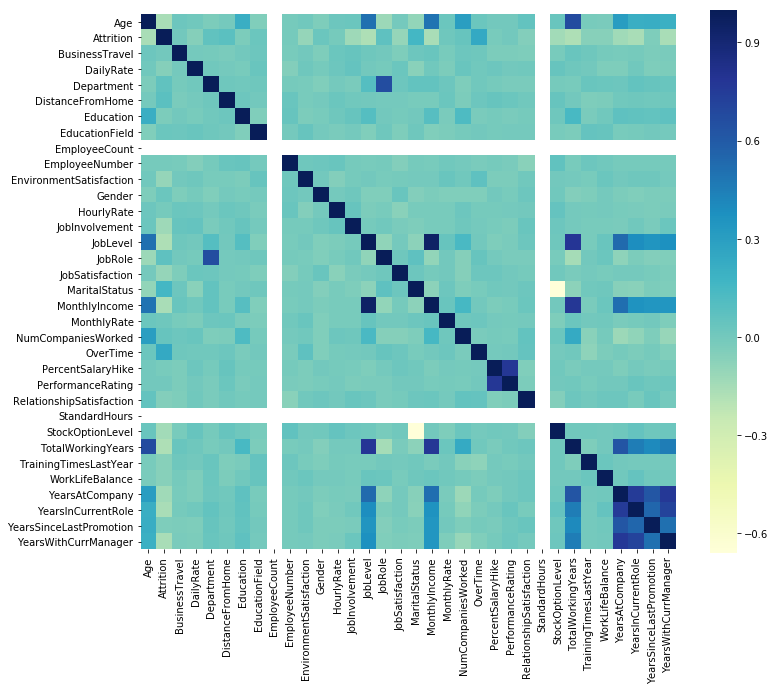

In [103]:
# Creating the correlation matrix 
corr = data.corr(method='pearson')

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="YlGnBu", square=True)
plt.show()

### 1.1 Exploring attrition and overtime 

The overall attrition rate in this dataset is 16%. That is, for every 100 employees, about 16 of them leave. Given overtime, 30.5% of the employees are prone to leave, whereas given no overtime, only 10% of them leave. The attrition rate given overtime is significantly higher than the attrition rate given no overtime (*t* = 9.27, *p* < .001).  

In [105]:
data[["OverTime", "Attrition"]].groupby("OverTime").Attrition.value_counts()

OverTime  Attrition
0         0            944
          1            110
1         0            289
          1            127
Name: Attrition, dtype: int64

[Text(0,0,'No OT, no Attrition'),
 Text(0,0,'No OT, Attrition'),
 Text(0,0,'OT, no Attrition'),
 Text(0,0,'OT, Attrition')]

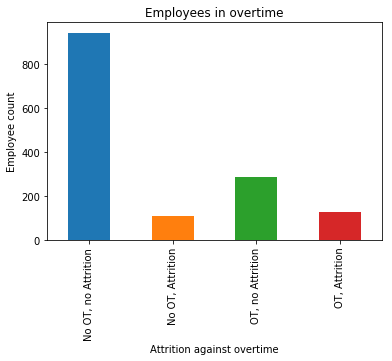

In [130]:
ax = data[["OverTime", "Attrition"]].groupby(data.OverTime).Attrition.value_counts().plot(kind='bar')
plt.title("Employee count by overttime and attrition")
plt.xlabel("Attrition against overtime")
plt.ylabel("Employee count")
plt.title("Employees in overtime")

x_labels = ['No OT, no Attrition', 'No OT, Attrition', 'OT, no Attrition', 'OT, Attrition']
ax.set_xticklabels(x_labels)

#do two plots, one with ot and another without ot. 

In [131]:
#checking the significance of the difference 

print("The t-statistic and the p-value are: {}".
      format(stats.ttest_ind(data[data.OverTime == 1].Attrition,data[data.OverTime==0].Attrition)))

The t-statistic and the p-value are: Ttest_indResult(statistic=9.729155002966676, pvalue=1.0092540336563068e-21)


### 1.2 Exploring attrition and distance from home

Attrition is also mildly correlated with distance from home. In the following charts we see that there is a 58-60% increase in attrition once an employee's distance from home is more than 10 miles. 
    

In [134]:
for i in range(0,29,6):
    dfg_mean = data[['DistanceFromHome', 'Attrition']].groupby('DistanceFromHome').mean()
    print(i, "-", i+5, "miles range, attrition mean: ", 
          dfg_mean.iloc[i:i+5].mean()[0])

0 - 5 miles range, attrition mean:  0.14376784846275367
6 - 11 miles range, attrition mean:  0.1467110196123357
12 - 17 miles range, attrition mean:  0.23346467129361867
18 - 23 miles range, attrition mean:  0.19280099237993972
24 - 29 miles range, attrition mean:  0.17642834138486313


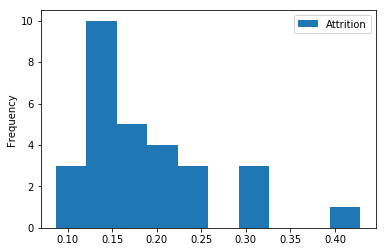

In [138]:
#showing in a histogram

data[['DistanceFromHome', 'Attrition']].groupby('DistanceFromHome').mean().plot(kind='hist')

Text(0,0.5,'Attrition mean')

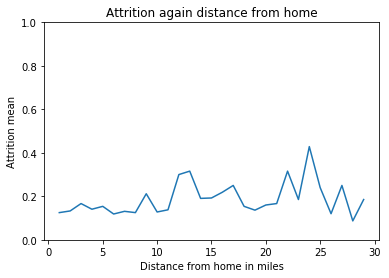

In [139]:
#(.233-.146)/.146  #59.5% increase
data.groupby("DistanceFromHome")['Attrition'].mean().plot()
plt.ylim(0,1)
plt.title("Attrition again distance from home")
plt.xlabel("Distance from home in miles")
plt.ylabel("Attrition mean")

## 2. Experiment proposal: Request For Comment

### 2.1 Problem 

The objective of this analysis is to find out what factor(s) contributes to employee attrition, and to propose a potential solution through a research proposal. Attrition creates inefficiency as a new employee hire procedure costs significant amount of time, money and effort.  

Preliminary analysis shows that overtime and distance from home are correlated with attrition. More employees tend to leave the company if their job responsibilities include overtime. Given overtime, 30.5% of the employees are prone to leave, whereas given no overtime, only 10% of them leave. Employees also tend to leave if the distance from home is more than 10 miles. Employees within the range of 5-10 miles distance from work has a 14% attrition rate. Employees who are within the range 11-17 miles have a 23% attrition rate. 

The common factor in these two variables seems to be the fact that these employees are spending more time away from home than their counterparts. A potential solution could be finding ways to increase their time at home.  

Therefore, the research question is: *How to decrease employee attrition by increasing the amount of time an employee spends at home?* 



### 2.2 Potential Solution

Offering certain amount of remote work (work-from-home) could be a potential solution for this problem. The hypothesis we want to test in this experiment is: *offering remote work for a day per week will decreases employee attrition by increasing employee comfort.* 

#### 2.2.1 Experiment 1

Employees who have more than 8 hours of overtime in a week, will be offered to take a one day work-from-home in every two weeks. 

#### 2.2.2 Experiment 2

Employees who travel more than 10 miles each way will be offered to take a one day work-from-home in every week.

Both experiments will run for three months but not simultaneously. Employees will be sent a survey to complete after three months asking if they enjoy this offer. 


#### 2.2.3 Potential biases and cautions

The variables, OverTime and DistanceFromHome, are not normally distributed in the dataset. Likewise, it is expected that the data collected for the experiment will have a small sample size and hence it'll suffer from sampling bias. We need to be careful while collecting data and limit data collection to similar number of samples from each level. At every step we need to check the p-values in the t-tests to see if the difference in the population is significant. 


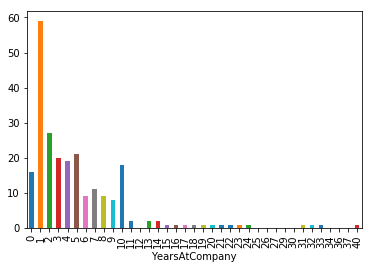

In [141]:
#data.groupby("OverTime")['Attrition'].value_counts().plot(kind='hist')
#data.groupby("DistanceFromHome")['Attrition'].value_counts().plot(kind='hist')
#years at company and role with oertime 

data[['YearsAtCompany', 'Attrition']].groupby('YearsAtCompany').Attrition.sum().plot(kind='bar')


Before moving on to the experimentation, we need to explore the relationship between attrition and the time spent at the company. From the above plot, we see that attrition rates are the higher within the first five years, and highest in the 2nd year. 

### 2.3 Methods

#### 2.3.1 Experiment 1

Sample selection 
- Select employees from the company's database who have more than eight hours of overtime in a week. Offer them one day work-from-home in every two weeks. Employees selected for this program would be the test group and their performance would be compared to the historical data (the control group). 


#### 2.3.2 Experiment 2

Sample selection 
- We offer all employees one day work-from-home in every two weeks. We will compare attrition across all employees. Ideally, employees who have more than ten miles of distance from homeare the group of interest, however, we expect a drop in attrition in all employees. We expect a larger attrition decrease in the people who live 10+ miles away.  


#### 2.3.3 Estimation of infrastructure

Only 28% of the employees in the original data set have overtime. And, given the fact that attrition rate is the highest in the second year, six months to one year seem to be a moderate time to gather enough data for significance testing. 

Another potential factor to be cautious about is if there is a certain time when employees leave (before new budget year etc.) then that won't be a good time to roll out the experiment. 


#### 2.4 Success metrics

I want to see significant percentage drop in the attrition rate within a year. The success metrics would be the significant t-statistics within the specified period of time. 


#### 2.4.1 Secondary metrics

We could design several secondary metrics and include them in the survey given to the employees. We could incorporate questions like, 'how likely you are to stay in the company for the next year?', or 'how likely you are to refer this company to friends?' could be interesting to analyze. Also, an increase in WorkLifeBalance could be a secondary metric which is expected to increase if employees spend more time at home. 

### 2.4 Future direction 

The longer the study runs the more data we gather and improve statistical significance. We could run the study for six months, and administer the  same survey twice a year. But ultimately what this dataset offers us is the insights of different factors on attrition. 